# Loading Modules

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import csv
    

%matplotlib inline

# Read CSV

In [3]:
house_train = pd.read_csv('train.csv')
house_train.shape

(1460, 81)

In [4]:
house_test = pd.read_csv('test.csv')
house_test.shape

(1459, 80)

In [5]:
house_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


# Fixing Level Names

In [6]:
# Define function to create the factor dataframe from data description text file
# important to retain the order of levels in the data description

# FIXING LEVEL NAMES 
factorLevel = {}

with open('data_description.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        if line.find(':') != -1 and line.find(' ') != 0:
            col_name = re.sub(':.*', '', line).strip()
            factorLevel[col_name] = []
        else:
            if len(re.findall('[a-zA-Z]', line)) > 0 :
                level = re.sub('\t.*', '', line).strip()
                if level !='':
                    factorLevel[col_name].append(level)             
                    
# outputs factorLevel as a list
#factorLevel = [k for k in factorLevel.items() if len(k[1]) > 0]
#factorLevel = pd.DataFrame(factorLevel)

# outputs factorLevel as a dict without any blank spaces
factorLevel = {k:v for k,v in factorLevel.items() if len(v) > 0}


In [7]:
factorLevel

{'Alley': ['Grvl', 'Pave', 'NA'],
 'BldgType': ['1Fam', '2FmCon', 'Duplx', 'TwnhsE', 'TwnhsI'],
 'BsmtCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
 'BsmtExposure': ['Gd', 'Av', 'Mn', 'No', 'NA'],
 'BsmtFinType1': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
 'BsmtFinType2': ['GLQ', 'ALQ', 'BLQ', 'Rec', 'LwQ', 'Unf', 'NA'],
 'BsmtQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po', 'NA'],
 'CentralAir': ['N', 'Y'],
 'Condition1': ['Artery',
  'Feedr',
  'Norm',
  'RRNn',
  'RRAn',
  'PosN',
  'PosA',
  'RRNe',
  'RRAe'],
 'Condition2': ['Artery',
  'Feedr',
  'Norm',
  'RRNn',
  'RRAn',
  'PosN',
  'PosA',
  'RRNe',
  'RRAe'],
 'Electrical': ['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'],
 'ExterCond': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'ExterQual': ['Ex', 'Gd', 'TA', 'Fa', 'Po'],
 'Exterior1st': ['AsbShng',
  'AsphShn',
  'BrkComm',
  'BrkFace',
  'CBlock',
  'CemntBd',
  'HdBoard',
  'ImStucc',
  'MetalSd',
  'Other',
  'Plywood',
  'PreCast',
  'Stone',
  'Stucco',
  'VinylSd',
  'Wd Sdng',
  'WdSh

In [8]:
# Checking for Level name differences

for varname in factorLevel.keys():
    house_train_factors = [str(x) for x in house_train.loc[:,varname].unique()]
    levelDiff = set(house_train_factors) - set(factorLevel[varname])
    if len(levelDiff) > 0 and levelDiff != {'nan'}:
        print(varname,':', levelDiff)


MSZoning : {'C (all)'}
Neighborhood : {'NAmes'}
BldgType : {'Twnhs', '2fmCon', 'Duplex'}
Exterior2nd : {'CmentBd', 'Brk Cmn', 'Wd Shng'}


In [9]:
# Change factorLevel levels to match house_train levels

house_train.MSZoning.unique()
factorLevel['MSZoning'][1] = 'C (all)'

house_train.Neighborhood.unique()
factorLevel['Neighborhood'][12] = 'NAmes'

house_train.BldgType.unique()
factorLevel['BldgType'][1:3] = ['2fmCon','Duplex']
factorLevel['BldgType'][4] = 'Twnhs'

house_train.Exterior2nd.unique()
factorLevel['Exterior2nd'][16] = 'Wd Shng'
factorLevel['Exterior2nd'][2] = 'Brk Cmn'
factorLevel['Exterior2nd'][5] = 'CmentBd'

In [10]:
house_train.dtypes.head()

Id               int64
MSSubClass       int64
MSZoning        object
LotFrontage    float64
LotArea          int64
dtype: object

In [11]:
# convert current numerical variables to object so it can be converted to category
house_train.MSSubClass =  house_train.MSSubClass.astype('str')
house_train.OverallQual = house_train.OverallQual.astype('str')
house_train.OverallCond = house_train.OverallCond.astype('str')

# Doing the same for the test set
house_test.MSSubClass =  house_test.MSSubClass.astype('str')
house_test.OverallQual = house_test.OverallQual.astype('str')
house_test.OverallCond = house_test.OverallCond.astype('str')

In [12]:
# Converting Column data types in data sets into category and setting levels from the factorlevel dictionary 
for varname in factorLevel.keys():
    house_train.loc[:,varname] = house_train.loc[:,varname].astype('category')
    house_train.loc[:,varname] = house_train.loc[:,varname].cat.set_categories(factorLevel[varname], ordered = True)
    house_test.loc[:,varname] = house_test.loc[:,varname].astype('category')
    house_test.loc[:,varname] = house_test.loc[:,varname].cat.set_categories(factorLevel[varname], ordered = True)
  

In [13]:
house_train.dtypes.head()

Id                int64
MSSubClass     category
MSZoning       category
LotFrontage     float64
LotArea           int64
dtype: object

In [14]:
house_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [15]:
house_test.dtypes.head()

Id                int64
MSSubClass     category
MSZoning       category
LotFrontage     float64
LotArea           int64
dtype: object

In [16]:
house_test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [17]:
# Nulling id column
del house_train['Id']
del house_test['Id']

#  VISUALIZATIONS

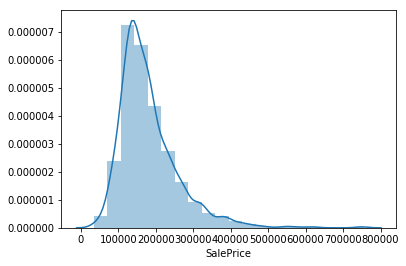

In [18]:
# HISTORGRAM OF SALESPRICE
sns.distplot(house_train.SalePrice, bins = 20)

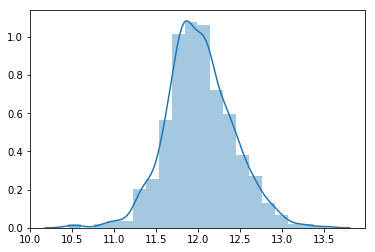

In [19]:
# Transforming Y into normal dist.
sns.distplot([np.log(house_train.SalePrice + 1)], bins = 20)

# CORRELATION PLOT BETWEEN CONTINUOUS VARIABLES

In [20]:
# Keeping only numeric variables
numeric_features = house_train.select_dtypes(include=['float64','int64']).columns.values
numeric_features

array(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'], dtype=object)

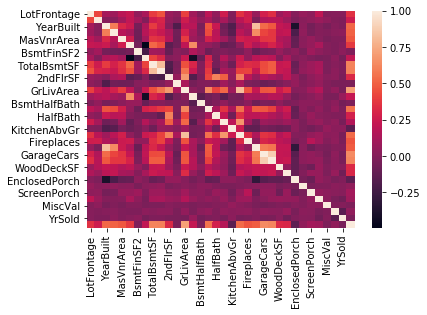

In [21]:
# correlating between continuous variables in training set
corr_num = house_train[numeric_features].corr()
#sns.set(font_scale = .5)
sns.heatmap(corr_num)

## TotalBsmtSF correlated to 1stFldrSF
## GarageCars and GarageArea correlated


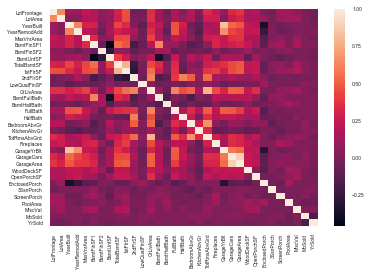

In [22]:
# correlating between continuous variables in TEST set 
corr_numtest = house_test[numeric_features[:-1]].corr()
sns.set(font_scale = .5)
sns.heatmap(corr_numtest)

# CORRELATIONS BETWEEN ORDINAL VARIABLES

In [ ]:
# THIS IS AVAILABLE IN SHU'S R MARKDOWN

# PRE PROCESSING 

In [23]:
# Understanding missingness
house_train.isnull().sum()

MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [24]:
house_test.isnull().sum()

MSSubClass          0
MSZoning            4
LotFrontage       227
LotArea             0
Street              0
Alley            1352
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
                 ... 
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         1
TotRmsAbvGrd        0
Functional          2
Fireplaces          0
FireplaceQu       730
GarageType         76
GarageYrBlt        78
GarageFinish       78
GarageCars          1
GarageArea          1
GarageQual         78
GarageCond

In [25]:
# Combining both house_train and house_test to clean data
house_train # 80 columns
house_test # 79 columns. need SalePrice placeholder
house_test['SalePrice'] = np.nan

# house_test starts on index row 1460 
house_full = pd.concat([house_train, house_test], axis = 0)
house_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


# IMPUTING GarageYrBlt (deleting and replacing with engineered features)


In [26]:
# Create new feature: hasGarage
house_full['hasGarage'] = [0 if x == True else 1 for x in house_full.GarageYrBlt.isnull()]

# replacing garageyrblt value 2207 to 2007
house_full.loc[house_full.GarageYrBlt == 2207, 'GarageYrBlt']  = 2007

# Create new feature GarageBlt (how many years after was the garage built after the house)
house_full['GarageBlt'] = house_full.GarageYrBlt - house_full.YearBuilt

# NA values will equal to zero assuming that these garages were built the same time as the house  according to Shu's graph
house_full.loc[house_full.GarageBlt.isnull(), 'GarageBlt'] = 0

# Delete the GarageYrBlt variable. No longer needed 
del house_full['GarageYrBlt']

house_full.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasGarage,GarageBlt
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,NaN,NaN,0,2,2008,WD,Normal,208500.0,1,0.0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,NaN,NaN,0,5,2007,WD,Normal,181500.0,1,0.0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,NaN,NaN,0,9,2008,WD,Normal,223500.0,1,0.0
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,1,83.0
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,NaN,NaN,0,12,2008,WD,Normal,250000.0,1,0.0


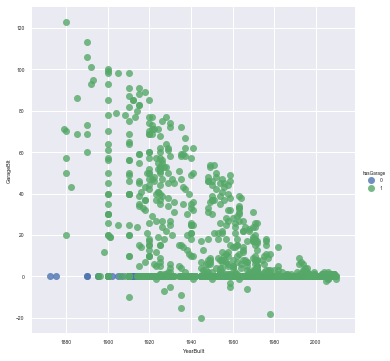

In [27]:
# Plot year built against garageblt
sns.lmplot(x = 'YearBuilt', y = 'GarageBlt', fit_reg = False, hue = 'hasGarage', data = house_full)


# TRANSFORMING YearModAdd

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,hasGarage,GarageBlt,isRemod,RemodAdd
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,2,2008,WD,Normal,208500.0,1,0.0,0,0
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,5,2007,WD,Normal,181500.0,1,0.0,0,0
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,9,2008,WD,Normal,223500.0,1,0.0,1,1
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,2,2006,WD,Abnorml,140000.0,1,83.0,1,55
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,12,2008,WD,Normal,250000.0,1,0.0,0,0


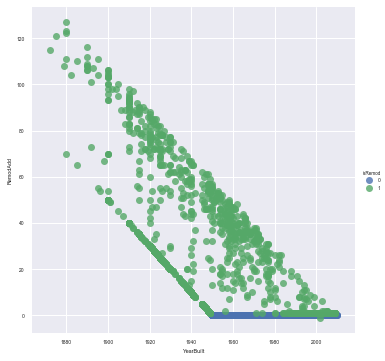

In [28]:
# New var isRemod: 0 if year remodelled is the same as year built, 1 otherwise 
house_full['isRemod'] = [0 if x == True else 1 for x in house_full.YearRemodAdd == house_full.YearBuilt]

# New var RemodAdd: YearRemodAdd - YearBuilt: How many years later was hosue remodeled?
house_full['RemodAdd'] = house_full.YearRemodAdd - house_full.YearBuilt

# Delete YearRemodAdd variable
del house_full['YearRemodAdd'] 

# Plot YearBuilt against RemodAdd
sns.lmplot(x = 'YearBuilt', y = 'RemodAdd', data = house_full, fit_reg = False, hue = 'isRemod')

house_full.head()

# DELETING THE 9 VARIABLES THAT HAVE ZERO TO NEAR ZERO VARIANCE (Shu)

In [29]:
del house_full["Street"]
del house_full["Utilities"]
del house_full["Condition2"]
del house_full["RoofMatl"]
del house_full["LowQualFinSF"]
del house_full["3SsnPorch"]
del house_full["PoolArea"]
del house_full["PoolQC"]
del house_full["MiscVal"]

house_full.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'Fence', 'MiscFeature',
       'MoSold', 'YrS

# IMPUTING OTHER FEATURES USING KNN

In [30]:
# Number of columns that have NAs
house_full.isnull().any().sum()

32

In [31]:
# Get columns names that have null values
house_full.loc[:,house_full.isnull().any()].columns.values

array(['MSZoning', 'LotFrontage', 'Alley', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageCars', 'GarageArea',
       'GarageQual', 'GarageCond', 'Fence', 'MiscFeature', 'SaleType',
       'SalePrice'], dtype=object)

In [32]:
# Export as CSV to be imputed by KNN in R
house_full.to_csv('C:/Users/moyke/Desktop/NYCDSA/Housing_Working/house_full_null.csv')

# R KNN Imputation work

# Import back as CSV after KNN imputation in R
house_full = pd.read_csv('house_full.csv')


In [33]:
# Checking for Null values once more (0)
house_full.isnull().any().sum()

0

In [34]:
# Get columns names that have null values (none)
house_full.loc[:,house_full.isnull().any()].columns.values

array([], dtype=object)

In [35]:
# Split house_full back to house_train and house_test
house_train = house_full.iloc[0:1460,:]
house_test = house_full.iloc[1460:,:]

# MODELING on the TRAINING SET!